In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

from autocnet.examples import get_path
from autocnet.graph.network import CandidateGraph
from autocnet.matcher.matcher import FlannMatcher
from autocnet.matcher.suppression_funcs import distance

from IPython.display import display

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Point to the adjacency Graph
adjacency = get_path('two_image_adjacency.json')
basepath = get_path('Apollo15')
cg = CandidateGraph.from_adjacency(adjacency, basepath=basepath)

#Apply SIFT to extract features
cg.extract_features(method='sift')

#Match
cg.match_features()
    
#Apply outlier detection
cg.symmetry_checks()
cg.ratio_checks()

m = cg.edge[0][1].masks

#Compute a fundamental matrix
cg.compute_fundamental_matrices(clean_keys=['ratio', 'symmetry'])

## Suppression
Create a suppression object using a default error tolerance and count.  Supply a custom function that suppresses based upon the distance between matches.

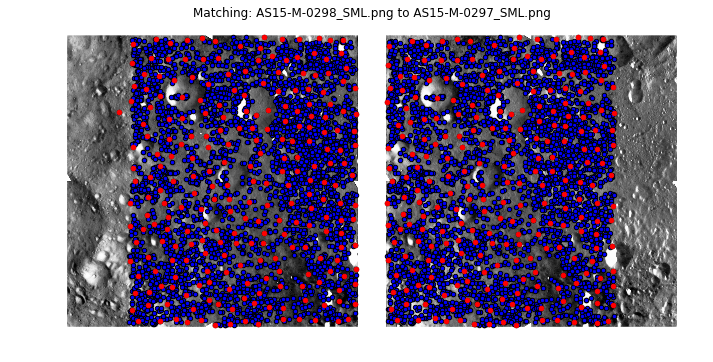

In [5]:
figsize(12,12)
cg.edge[0][1].suppress(clean_keys=['fundamental'], func=distance)

# Plot, in blue the points that passed all outlier detectors so far
cg.edge[0][1].plot(clean_keys=['fundamental'], line_kwargs={'linewidth':0})
# Overlay, in red, the points that remain after suppression
cg.edge[0][1].plot(clean_keys=['suppression'], line_kwargs={'linewidth':0}, scatter_kwargs={'color':'red'})

### Suppression and Do/Undo
The suppression object, associated with each edge is a stateful observable.  This means that other objects can observe the suppression object.  If the suppression object changes, all of the observers are notified and can take whatever action they have registered.  In addition to being observable, the suppression object keeps a history of itself.  This supports do/undo functionality (that alerts observers).  

The cell above created that object with a custom distance function.  The cells below alter $k$, the desired number of points, and $k_{error}$, the acceptable percentage of error in $k$.  These changes are then rolled back and forth.

The plotting calls remain the same for all of these example, only the first line of each is altered.

--------

$k=10$ and $k_{error}$ defaults to 10%  

*Take note of the bad point, in the left image, that has made it through the ratio, symmetry, and fundamental matrix computation tests.*

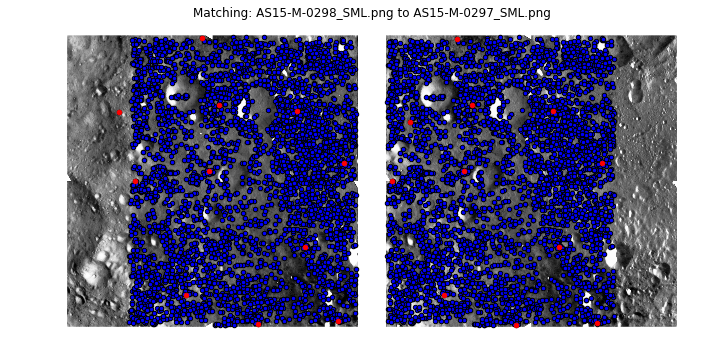

In [7]:
cg.edge[0][1].suppress(clean_keys=['fundamental'], func=distance, k=10)

# Plot, in blue the points that passed all outlier detectors so far
cg.edge[0][1].plot(clean_keys=['fundamental'], line_kwargs={'linewidth':0})
# Overlay, in red, the points that remain after suppression
cg.edge[0][1].plot(clean_keys=['suppression'], line_kwargs={'linewidth':0}, scatter_kwargs={'color':'red'})

$k = 50$

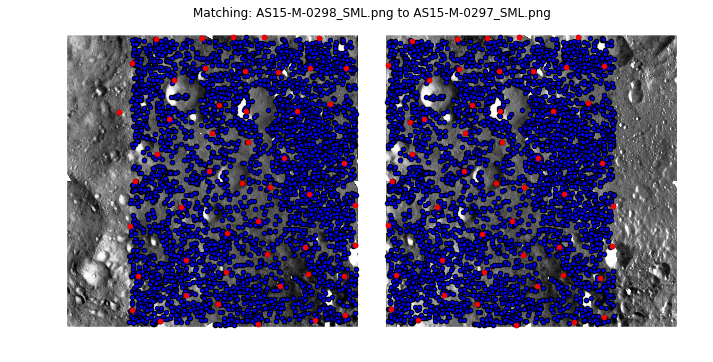

In [8]:
cg.edge[0][1].suppress(clean_keys=['fundamental'], func=distance, k=50)

# Plot, in blue the points that passed all outlier detectors so far
cg.edge[0][1].plot(clean_keys=['fundamental'], line_kwargs={'linewidth':0})
# Overlay, in red, the points that remain after suppression
cg.edge[0][1].plot(clean_keys=['suppression'], line_kwargs={'linewidth':0}, scatter_kwargs={'color':'red'})

$k=100$ and $k_{error} = 25%$

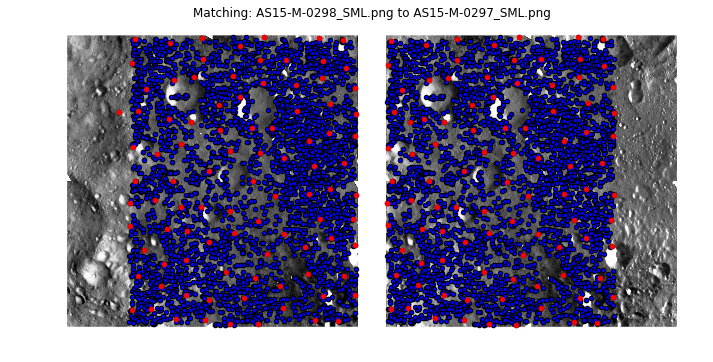

In [9]:
cg.edge[0][1].suppress(clean_keys=['fundamental'], func=distance, k=100, k_error=0.25)

# Plot, in blue the points that passed all outlier detectors so far
cg.edge[0][1].plot(clean_keys=['fundamental'], line_kwargs={'linewidth':0})
# Overlay, in red, the points that remain after suppression
cg.edge[0][1].plot(clean_keys=['suppression'], line_kwargs={'linewidth':0}, scatter_kwargs={'color':'red'})

Using the suppression object we can access some attributes to see how many valid points.

In [10]:
cg.edge[0][1].suppression.nvalid

94

## Rollback
Now we will undo that last change.  Perhaps the error was just too high (it was not near 25% in this case, but imagine it was).

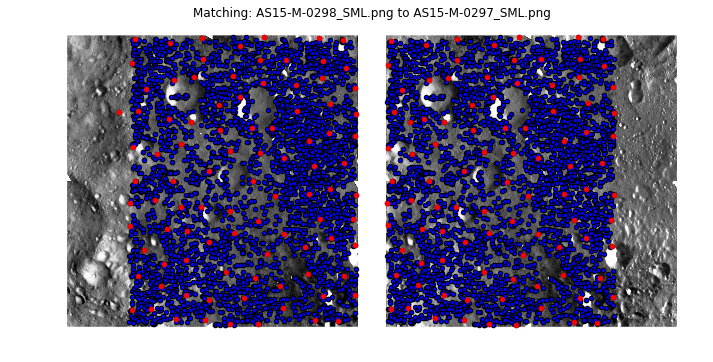

In [12]:
cg.edge[0][1].suppression.rollback()

# Plot, in blue the points that passed all outlier detectors so far
cg.edge[0][1].plot(clean_keys=['fundamental'], line_kwargs={'linewidth':0})
# Overlay, in red, the points that remain after suppression
cg.edge[0][1].plot(clean_keys=['suppression'], line_kwargs={'linewidth':0}, scatter_kwargs={'color':'red'})